### TRAN Minh-Quan  /   M1 MINT
# TP 2. PARTIE 2. LDA - QDA. k-NN                                               

In [1]:
print("Hello world!")

Hello world!


## Plan :

* 1) Dataset Iris :  Naive Bayes, LDA, QDA

* 2) Dataset Vowel :  Naive Bayes, LDA, QDA, k-NN


Commençons par importer toutes les librairies nécessaires au TP :

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns 

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score



# 1. Dataset Iris


In [4]:
from sklearn import datasets
iris = datasets.load_iris()

In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Figures',
 'iris',
 'iris.dot',
 'iris.pdf',
 'TP2_PARTIE_1_Etudiant.ipynb',
 'TP2_PARTIE_2_ TRAN_Minh-Quan.ipynb',
 'vowel.test.csv',
 'vowel.train.csv']

In [6]:

names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [7]:
from sklearn.datasets import load_iris
# loading the iris dataset
iris = load_iris()
X = iris.data[: , [1,3]]
y = iris.target
h=.02

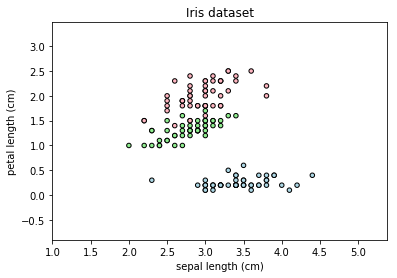

In [8]:
cmap_bold = ListedColormap(['#ADD8E6', '#90EE90','#FFB6C1'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Iris dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.savefig("./Figures/sklearn_examples_iris")

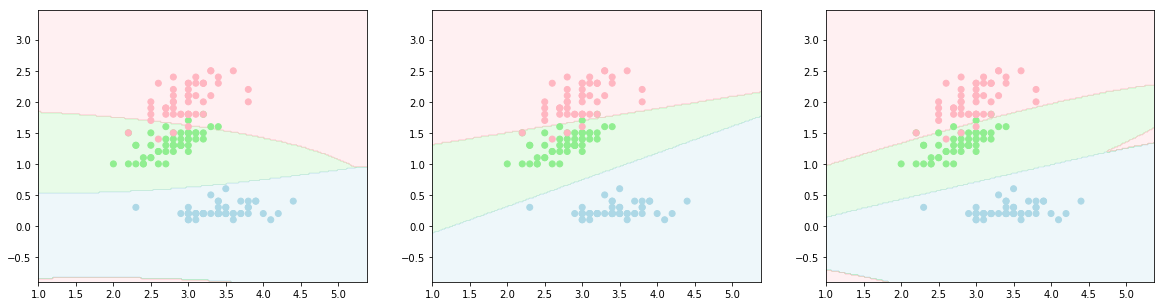

In [9]:
figure = plt.figure(figsize=(20, 5))
h = .02  # step size in the mesh
i=0
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

for name, clf in zip(names, classifiers):
    i += 1
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z_p = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    
    #print(Z_p.shape)
    
    # Put the result into a color plot
    Z = np.argmax(Z_p,axis=1) + 1
    Z = Z.reshape(xx.shape)
   
    ax.contourf(xx, yy, Z, cmap=cmap_bold, alpha=0.2)

    # Plot also the points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    

In [10]:
len(np.arange(x_min, x_max, h))*len(np.arange(y_min, y_max, h))

48400

In [11]:
np.c_[xx.ravel(), yy.ravel()].shape

(48400, 2)

In [12]:
Z

array([[3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       [3, 3, 3, ..., 1, 1, 1],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int64)

In [13]:
Z = np.argmax(Z_p,axis=1) + 1
print(len(np.c_[xx.ravel(), yy.ravel()]))
print(Z.shape[0])

48400
48400


# 2. Dataset Vowel


* Source des données : https://web.stanford.edu/~hastie/ElemStatLearn/data.html

Tout d'abord il faut commencer par séparer le jeu de données en données d'entrainement et en données de test. En effet, on va utiliser les données d'entrainement pour entraîner notre modèle et on garde les données de test pour tester la performance du modèle plus tard.

* Données d'entrainement :

In [14]:
train=pd.read_csv('vowel.train.csv', sep=',', index_col=0)
train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


* Données de test : 

In [15]:
test=pd.read_csv('vowel.test.csv', sep=',', index_col=0)
test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


* On peut vérifier les tailles des données d'entrainement et de test : 

In [16]:
print(train.shape)
print(test.shape)

(528, 11)
(462, 11)


 * Question qu'on peut se poser avant de commencer : Quel est le problème d'apprentissage ici ? 
 
 C'est un problème de classification multi-classe, avec 11 classes dans notre cas.

 * On affiche les histogrammes de *train* et *test* afin de vérifier si le nombre d'observation par classe (class balancing) est bien équilibré :

(array([48., 48., 48., 48., 48., 48., 48., 48., 48., 96.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

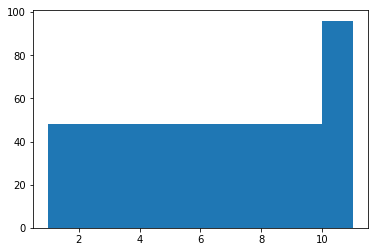

In [17]:
# Train: 
plt.hist(train['y'])

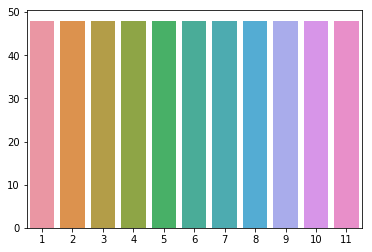

In [18]:
# Pour faire un histogramme plus beau
sns.barplot(np.unique(train['y']),train.groupby('y').count().values[:,0])


(array([42., 42., 42., 42., 42., 42., 42., 42., 42., 84.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

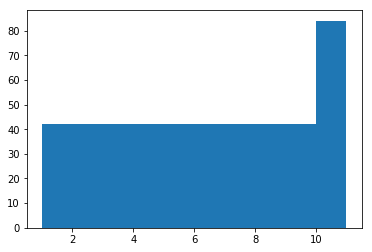

In [19]:
# Test :
plt.hist(test['y'])

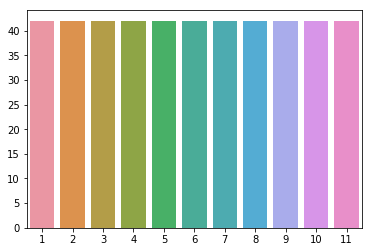

In [20]:
sns.barplot(np.unique(test['y']),test.groupby('y').count().values[:,0])

Pour étudier nos données, il ne faut pas oublier d'enlever la 1ère colonne qui représente juste le numéro des lignes/observations.


Pour cela, on va définir les matrices **x_train** et **x_test** de feature et les vecteurs **y_train** et **y_test** de label : 

In [21]:
y_train = train.values[:,0]
x_train = train.values[:,1:]

In [22]:
y_test = test.values[:,0]
x_test = test.values[:,1:]

On vérifie bien que la taille des matrices est bonne puisqu'on a enlevé la 1ère colonne :

In [23]:
print(x_train.shape)
print(x_test.shape)

(528, 10)
(462, 10)


Maintenant que nos données sont prêts, on va répéter l'analyse faite sur le dataset iris avec les données vowel.

# Machine Learning

In [24]:
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# NB (Naive Bayes)


In [25]:
NB = GaussianNB()

In [26]:
NB_fit = NB.fit(X=x_train,y=y_train)
print("Le score sur le train est ", ("%.3f" % accuracy_score( NB_fit.predict(x_train),y_train ) ) )
print("Le score sur le test est ", ("%.3f" % accuracy_score( NB_fit.predict(x_test),y_test ) ) )


Le score sur le train est  0.720
Le score sur le test est  0.461


Nous avons environ 500 données audio en tout, 48 données par voyelle donc un score sur le test de 46% c'est déjà pas mal.

# LDA (Linear discriminant analysis)

In [27]:
LDA = LinearDiscriminantAnalysis()

In [28]:
LDA_fit = LDA.fit(X=x_train,y=y_train)
print("Le score sur le train est ", ("%.3f" % accuracy_score( LDA_fit.predict(x_train),y_train ) ) )
print("Le score sur le test est ", ("%.3f" % accuracy_score( LDA_fit.predict(x_test),y_test ) ) )

Le score sur le train est  0.684
Le score sur le test est  0.444


# QDA (Quadratic discriminant Analysis)

In [29]:
QDA = QuadraticDiscriminantAnalysis()

In [30]:
QDA_fit = QDA.fit(X=x_train,y=y_train)
print("Le score sur le train est ", ("%.3f" % accuracy_score( QDA_fit.predict(x_train),y_train ) ) )
print("Le score sur le test est ", ("%.3f" % accuracy_score( QDA_fit.predict(x_test),y_test ) ) )

Le score sur le train est  0.989
Le score sur le test est  0.472


### Observation : 

On remarque que le score sur le test des 3 modèles sont à peu près équivalent : 46% pour NB, 44% pour LDA et 47% pour QDA. Ce n'est pas un pourcentage très élevé donc la performance de prédiction des 3 modèles n'est pas très bonne. Cependant, le modèle LDA est un peu moins performant que les 2 autres modèles car son score sur le train et sur le test est en dessous du score des autres. Ensuite vient le modèle Naive Bayes puis enfin le modèle QDA qui possède le score le plus élevé sur le score de train et de test parmi les 3 modèles.

Nous allons donc essayer un autre modèle qui est le k-NN afin de voir si on peut obtenir un meilleur score sur le test ou non.

# K-NN (K Nearest Neighbors)

https://openclassrooms.com/courses/initiez-vous-au-machine-learning/tp-entrainez-le-modele-des-k-plus-proches-voisins-k-nn

Utiliser l'algo k-NN pour différents k et comparez ses performances avec les méthodes précédentes.

### But de l'algorithme K-NN :
Pour une observation qu’on souhaite prédire et qui ne fait pas parti du jeu de données, 
l’algorithme va chercher les k données les plus proches notre observation.
Ensuite pour ces k voisins, l’algorithme se basera sur leurs variables de sortie afin de prédire 
la valeur de notre observation.

* Il faut tout d'abord importer le package *neighbors* de la librairie *sklearn* pour pouvoir utiliser l'algorithme directement : 

In [31]:
from sklearn import neighbors 

Commençons par regarder ce qui se passe si on crée un premier classifieur 3-NN qui prend en compte les 3 plus proches voisins :


* Création du classifieur 3-NN :

In [32]:
knn = neighbors.KNeighborsClassifier(n_neighbors=6)

* On utilise la méthode *.fit* sur nos données d'apprentissage pour effectuer un ajustement du modèle :

In [33]:
knn_fit = knn.fit(x_train, y_train)

* Ensuite, une fois entrainé, le modèle peut être utilisé pour effectuer des prédictions 
grâce à un appel de la méthode *.predict()*.

* A l'aide de la méthode accuracy_score on va tester les performances de prédiction de notre classifieur 3-NN :

In [34]:
print("Le score sur le train est ", ("%.3f" % accuracy_score( knn_fit.predict(x_train),y_train ) ) )
print("Le score sur le test est ", ("%.3f" % accuracy_score( knn_fit.predict(x_test),y_test ) ) )

Le score sur le train est  0.977
Le score sur le test est  0.608


On obtient ainsi le *score* qui représente le pourcentage de prédiction correct trouvé par le classifieur.

Le score sur le train est très élevé (proche de 100%) ce qui est normal puisqu'on a entrainé notre modèle avec les données d'entrainement *train*.

Ce qui nous intéresse donc c'est les informations sur les données de test. Il faut donc minimiser l'erreur sur les données de test et obtenir le score le plus elevé possible sur le test.

### Optimisation du score sur les données test :

Dans cette partie, on va essayer de trouver la valeur de *k* pour laquelle on obtient le score le plus élevé sur les données de test.

Cependant, k est un **hyperparamètre** ce qui veut dire que l'algorithme ne sera pas capable de l'apprendre automatiquement.
Donc c'est à nous de chercher le meilleur k à l'aide du jeu de données test.

* Pour trouver le k optimal, on va donc tester notre modèle pour tous les k allant de 1 à 50 et afficher la performance en fonction de k :


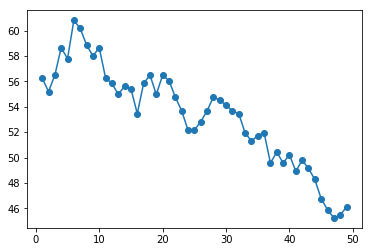

In [35]:
perf = []
for k in range(1,50):
    knn = neighbors.KNeighborsClassifier(k)
    perf.append(100*(knn.fit(x_train, y_train).score(x_test, y_test)))
plt.plot(range(1,50), perf, 'o-')
plt.show()

Sur le graphe ci-dessus, nous avons la performance de notre modèle en fonction des différentes valeurs de k.

* Donc pour trouver le k optimal il suffit de regarder pour quelle valeur de k on a la plus grande performance (le meilleur k est celui pour lequel la courbe est la plus élevé) :

In [36]:
np.argmax(perf)

5

La fonction *argmax* ci-dessus nous renvoie 5 ce qui correspond à k=6 (car en python, la position commence de 0).

* Remarque : Sur le graphique ci-dessus, on peut voir qu'on sous-apprend à droite et qu'on sur-apprend à gauche.


#### Autre manière pour trouver le  k optimal :

* On crée deux tableaux vides *acc_train* et *acc_test* dans lesquels on va stocker les scores du train et du test pour tous les k allant de 1 à 50 :

In [37]:
acc_train = []
acc_test = []

for k in np.arange(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k) 
    knn_fit = knn.fit(X=x_train, y=y_train)
    acc_train.append(accuracy_score(knn_fit.predict(x_train),y_train))
    acc_test.append(accuracy_score(knn_fit.predict(x_test),y_test))

* On crée une variable *k_hat* qui va renvoyer la position dans le tableau *acc_test* 
du plus grand score du test. Cette position correspond au k optimal : 

In [38]:
k_hat = np.argmax(acc_test)
k_hat

5

* On peut afficher le score du train et du test pour le k optimal, c'est-à-dire k=6 : 

In [39]:
print("Les scores : train", ("%.3f" % acc_train[k_hat]), "/ test :" ,("%.3f" % acc_test[k_hat]))

Les scores : train 0.977 / test : 0.608


* On peut aussi tracer sur un même graphique, les courbes de score du train et du test, ainsi qu'une ligne verticale représentant le k optimal :  

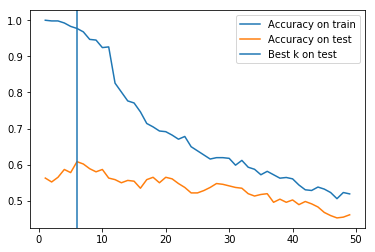

In [40]:
plt.plot(np.arange(1,50),acc_train, label ="Accuracy on train")
plt.plot(np.arange(1,50),acc_test, label ="Accuracy on test")
plt.axvline(np.arange(1,50)[k_hat], label ="Best k on test")
plt.legend()


### Conclusion : 

Grâce à l'étude sur le jeu de données test, on a donc trouvé que pour le modèle k-NN, le classifieur le plus performant est le classifieur 6-NN, avec k=6, qui prend donc en compte 6 voisins. Cela veut dire que c'est celui qui classifie le mieux les données dans notre cas.

* **Comparaison avec les 3 modèles NB, LDA, QDA** : Avec le modèle k-NN (en prenant le k optimal k=6) on obtient un score sur le test d'environ 61% alors que pour les 3 autres modèles étudiés ci-dessus, on a seulement un score sur le test allant de 44% à 47%. On peut donc en conclure que pour notre dataset Vowel, le modèle k-NN, avec k =6, est plus performant concernant la prédiction par rapport aux 3 autres modèles. Cependant, l'algorithme du k-NN est souvent très peu utilisé et n'est pas fait pour des données de grande taille car il est très coûteux en puissance de calculs.


## Cross-validation pour k-NN

* **Principe de la cross-validation** : 

Dans un premier temps, nous allons diviser aléatoirement nos données d'apprentissage k groupe de taille à peu près égale. Ensuite le premier groupe est traité comme données d'entrainement et la méthode k-NN est appliquée aux k-1 groupes restants. On calcule ainsi la précision de prédiction obtenu. Cette procédure est répétée k fois avec à chaque fois, un groupe différent qui est traité comme donnée d'entrainement. Ce processus donne k précisions de prédiction de test qui sont ensuite moyennées.

In [41]:
from sklearn.model_selection import cross_val_score

Prenons par défaut cv=5 qui correspond à une division en 5 groupes :

In [42]:
cv_scores = []

for k in np.arange(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [43]:
print(scores)

[0.4        0.45454545 0.50909091 0.56565657 0.42424242]


Dans les résultats affichés ci-dessus, nous avons la précision de prédiction pour chaque itération (40%, 45%, 50%, 56%, 42%).

Nous pouvons ensuite moyenner ces précisions :

In [44]:
print(scores.mean())

0.4707070707070707


Cependant ce qui nous intéresse c'est le meilleur score de prédiction sur le test donc on va cherche le max dans le tableau de score :

In [45]:
print(cv_scores)

[0.6852525252525252, 0.6785858585858586, 0.6511111111111111, 0.6406060606060606, 0.6165656565656567, 0.6149494949494949, 0.5907070707070707, 0.5854545454545454, 0.5599999999999999, 0.5525252525252525, 0.5478787878787879, 0.5294949494949496, 0.5337373737373737, 0.5361616161616162, 0.5286868686868686, 0.5369696969696969, 0.5339393939393939, 0.5123232323232324, 0.49757575757575756, 0.5125252525252526, 0.5080808080808081, 0.49252525252525253, 0.48505050505050507, 0.49393939393939396, 0.47898989898989897, 0.4787878787878788, 0.4666666666666667, 0.4705050505050504, 0.47292929292929287, 0.45010101010101006, 0.4632323232323232, 0.44080808080808076, 0.4426262626262626, 0.4424242424242424, 0.4573737373737374, 0.44707070707070706, 0.4468686868686868, 0.4505050505050505, 0.4446464646464647, 0.4541414141414141, 0.45212121212121215, 0.46565656565656566, 0.47272727272727266, 0.477979797979798, 0.46484848484848484, 0.4688888888888889, 0.46141414141414144, 0.4688888888888888, 0.4707070707070707]


In [46]:
print('Max of list', max(cv_scores))

Max of list 0.6852525252525252


* **Conclusion** : 

Avec la méthode de cross-validation sur le k-NN, nous avons donc obtenu un score sur le test de 68.5% ce qui est un peu plus elevé que ce qu'on avait trouvé sans faire de cross-validation sur le k-NN (60.8%). La cross-validation sur le k-NN est donc la meilleur méthode dans notre cas (par rapport aux autres méthodes étudiées dans ce TP) pour construire le meilleur classifieur afin d'obtenir la meilleur précision sur la prédiction.